# Predicting Departure Delays

---


In [217]:
# General Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler as stds
from sklearn.model_selection import GridSearchCV 


# R1.1 Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

#R1.2 Imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

#R1.3 Imports
from sklearn.ensemble import RandomForestClassifier

## Data Preperation

There is special categories in these models, so the data must be prepared and classified before creating a model.


In [218]:
df = pd.read_csv("../data/ORD_11_21-11-22_model.csv")

In [219]:
# test = True # this is a temporary flag so it can run quickly
# if test:
#     df = df.iloc[0:1001]

In [220]:
# Two class subset
# df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'ArrDelay', 'Distance',
#                   'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TaxiIn', 'TaxiOut']]
# df_y = df['DepDel15']

In [221]:
# df.hist(column='DepDel15')

In [222]:
df['DepDel15'].value_counts(normalize=True) * 100

0.0    82.088155
1.0    17.911845
Name: DepDel15, dtype: float64

## Logisitic Regression

In [223]:
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance', 'CRSDepTime',
 'CRSArrTime', 'Quarter', 'Month', 'DayOfWeek']]
df_y = df['DepDel15']
# 'TaxiOut'
# 'LateAircraftDelay'

In [224]:
# numeric=['Distance', 'TaxiOut']
# sc=stds()
# x_train[numeric]=sc.fit_transform(x_train[numeric])
# x_test[numeric]=sc.transform(x_test[numeric])

In [225]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=2)
df_x, df_y = oversample.fit_resample(df_x, df_y)

In [226]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)

In [227]:
# numeric=['Distance', 'TaxiOut']
# sc=stds()
# x_train[numeric]=sc.fit_transform(x_train[numeric])
# x_test[numeric]=sc.transform(x_test[numeric])

In [228]:
# fit = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight={0:18, 1:81}, random_state=15).fit(x_train, y_train)
# fit = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=15).fit(x_train, y_train)

In [229]:
fit = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=15, class_weight='balanced', fit_intercept=True, penalty='l2', C=0.15).fit(x_train, y_train)

In [230]:
# lst_tst = []
# for i in range(0,101):
#     for j in range(0,101):
#         lst_tst.append({0:i, 1:j})

# print(lst_tst)

In [231]:
# grid_params = [{'class_weight': lst_tst,
# "penalty": ['l1', 'l2'],
# 'fit_intercept':[True, False]
# }]

# print(grid_params)

In [232]:
# grid_search = GridSearchCV(fit, grid_params, cv=10, scoring='accuracy')
# grid_search.fit(x_train, y_train)
# print(grid_search.best_params_)

In [233]:
y_pred = fit.predict(x_test)
y_prob = fit.predict_proba(x_test)
y_prob = y_prob[:,1] # want the positive values

Text(0.5, 1.0, 'Departure Delay Confusion Matrix (Logistic Regression)')

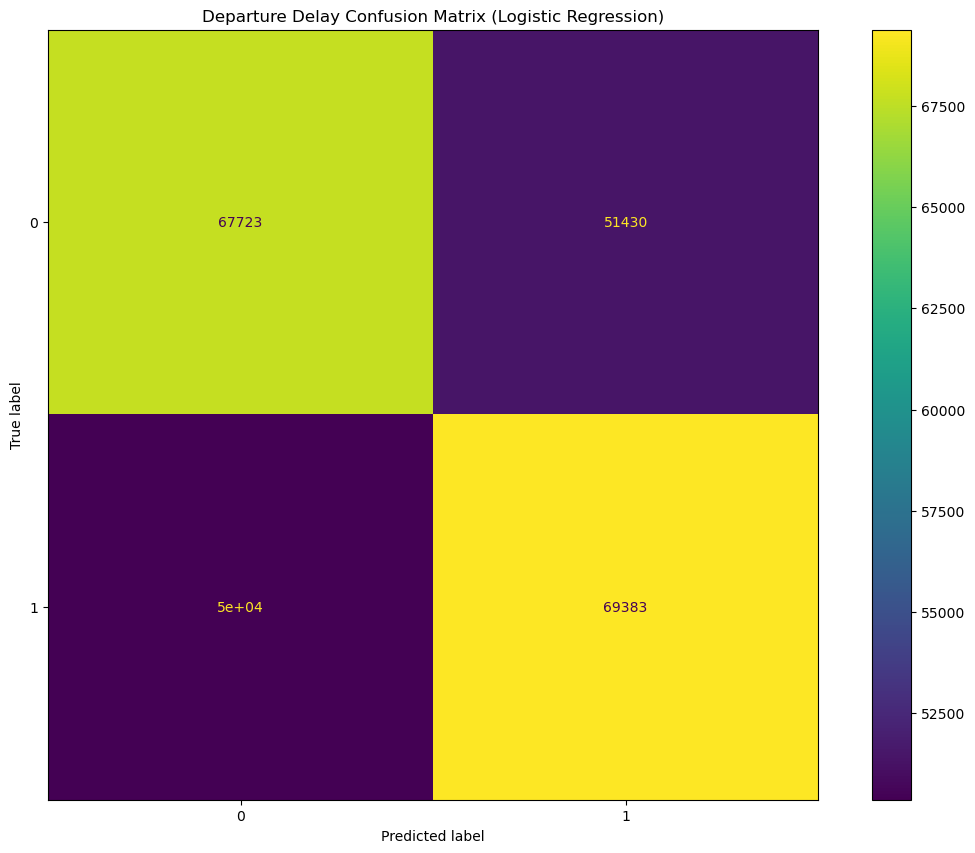

In [234]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(ax=ax1)
ax1.set_title("Departure Delay Confusion Matrix (Logistic Regression)")

In [235]:
print(f"Accuracy of Model: {accuracy_score(y_test, y_pred)}")
print(f"Precision of Model: {precision_score(y_test, y_pred)}")
print(f"Recall of Model: {recall_score(y_test, y_pred)}")

Accuracy of Model: 0.5739174114150568
Precision of Model: 0.574300778889689
Recall of Model: 0.5794374571996459


AUC Score: 0.5991348061642169


Text(0.5, 1.0, 'Departure Delay ROC Curve (Logistic Regression)')

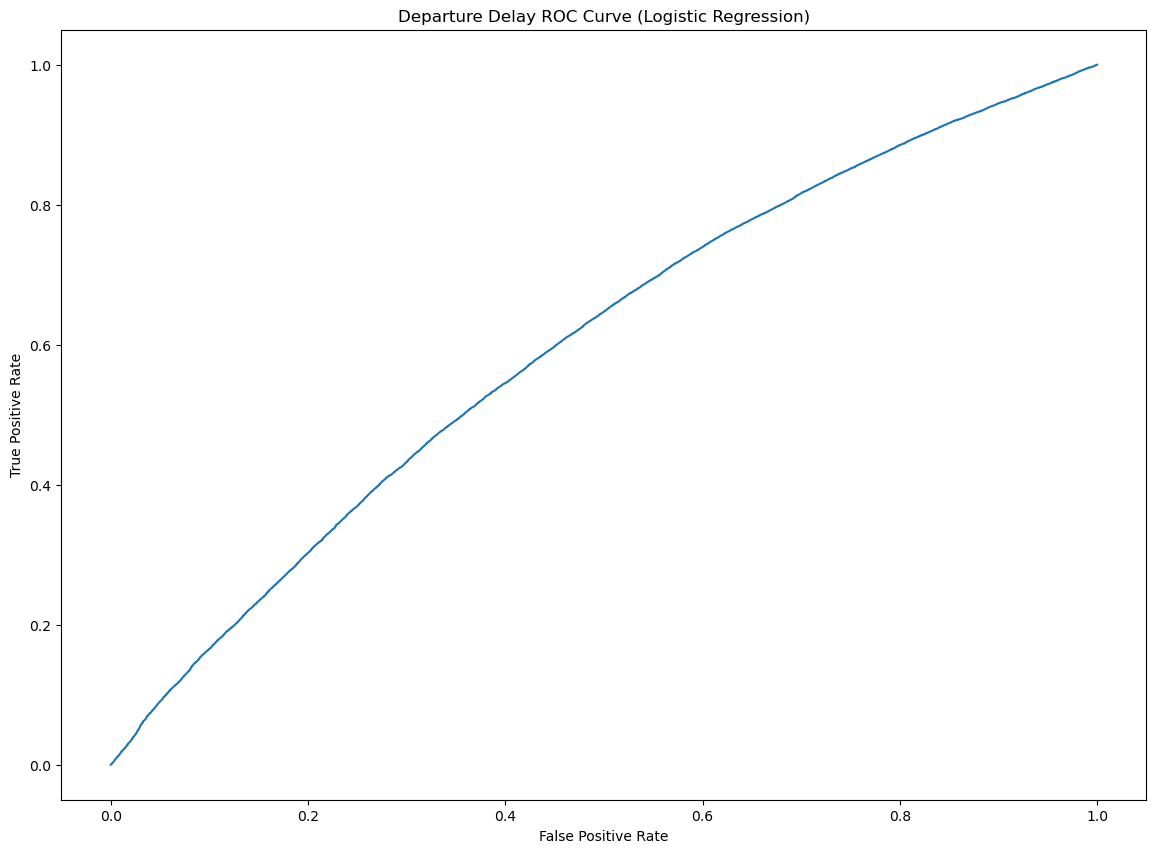

In [236]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

print(f"AUC Score: {auc}")

ax1.plot(fpr, tpr)
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.set_title("Departure Delay ROC Curve (Logistic Regression)")

Text(0.5, 1.0, 'Departure Delay Precision Vs. Recall (Logistic Regression)')

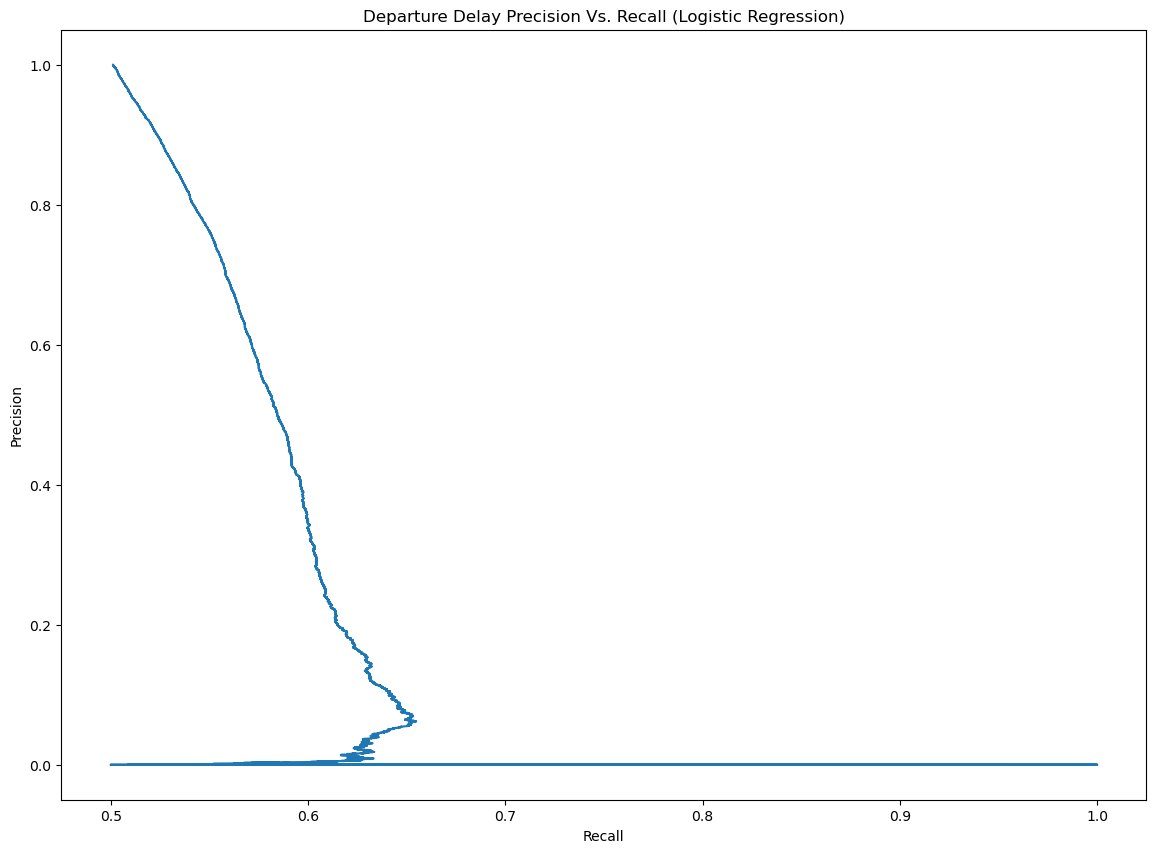

In [237]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
prec, recall, _ = precision_recall_curve(y_test, y_prob)

ax1.plot(prec, recall)
ax1.set_ylabel('Precision')
ax1.set_xlabel('Recall')
ax1.set_title("Departure Delay Precision Vs. Recall (Logistic Regression)")

## Logistic Regression (Multi-Class)

In [238]:
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance', 'CRSDepTime',
 'CRSArrTime', 'Quarter', 'Month', 'DayOfWeek']]
df_y = df['DepartureDelayGroups']
# LateAircraftDelay

In [239]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)

In [240]:
fit = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=15, class_weight='balanced', multi_class='multinomial', fit_intercept=True, penalty='l2', C=0.15).fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = fit.predict(x_test)
y_prob = fit.predict_proba(x_test)
y_prob = y_prob[:,1] # want the positive values

Text(0.5, 1.0, 'Departure Delay Group Confusion Matrix (Logistic Regression)')

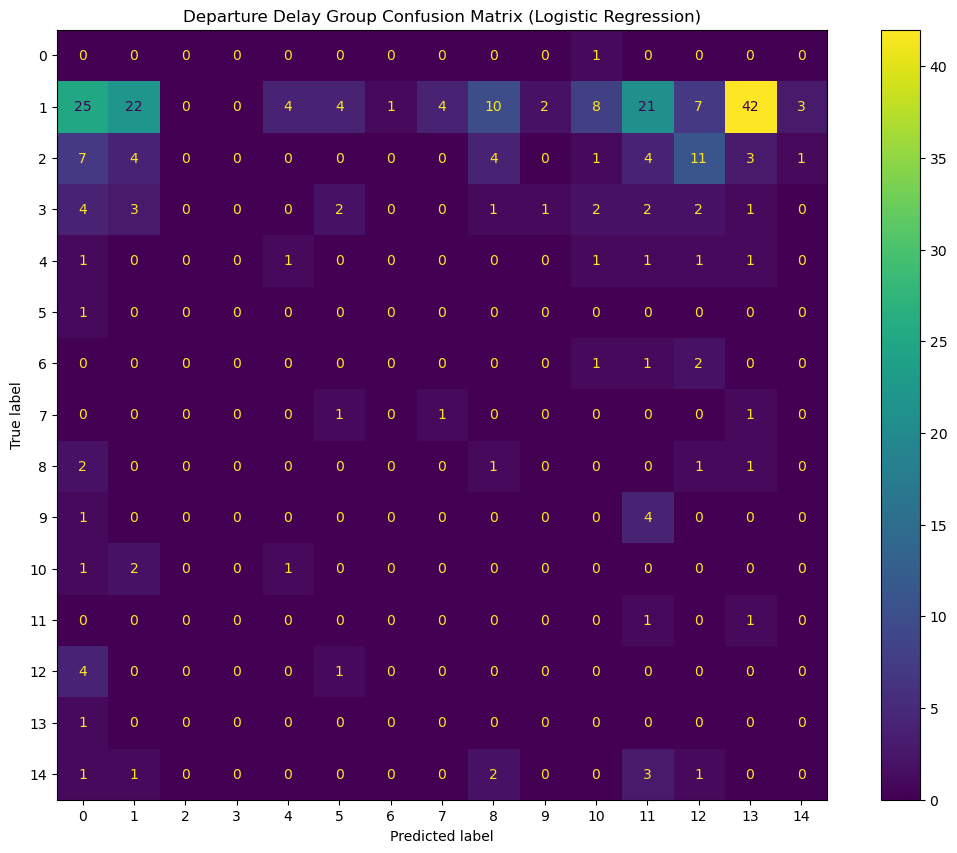

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(ax=ax1)
ax1.set_title("Departure Delay Group Confusion Matrix (Logistic Regression)")

In [ ]:
print(f"Accuracy of Model: {accuracy_score(y_test, y_pred)}")

Accuracy of Model: 0.10358565737051793


## Random Forrest Decision Tree (2-Class)

In [ ]:
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance', 'CRSDepTime',
 'CRSArrTime', 'Quarter', 'Month', 'DayOfWeek']]
df_y = df['DepDel15']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=2)
df_x, df_y = oversample.fit_resample(df_x, df_y)

In [ ]:
rfc = RandomForestClassifier(random_state=15).fit(x_train, y_train)

In [ ]:
rfc_pred = rfc.predict(x_test)

In [ ]:
print(f"Accuracy of Model: {accuracy_score(y_test, rfc_pred)}")

Accuracy of Model: 0.7529880478087649


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00       0.0
        -1.0       0.00      0.00      0.00       0.0
         0.0       0.00      0.00      0.00     185.0
         1.0       0.00      0.00      0.00      66.0
         2.0       0.00      0.00      0.00       0.0
         3.0       0.00      0.00      0.00       0.0
         4.0       0.00      0.00      0.00       0.0
         5.0       0.00      0.00      0.00       0.0
         6.0       0.00      0.00      0.00       0.0
         7.0       0.00      0.00      0.00       0.0
         8.0       0.00      0.00      0.00       0.0
         9.0       0.00      0.00      0.00       0.0
        10.0       0.00      0.00      0.00       0.0
        11.0       0.00      0.00      0.00       0.0
        12.0       0.00      0.00      0.00       0.0

    accuracy                           0.00     251.0
   macro avg       0.00      0.00      0.00     251.0
weighted avg       0.00   

c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\en

Text(0.5, 1.0, 'Departure Delay Confusion Matrix (Random Forrest Decision Tree)')

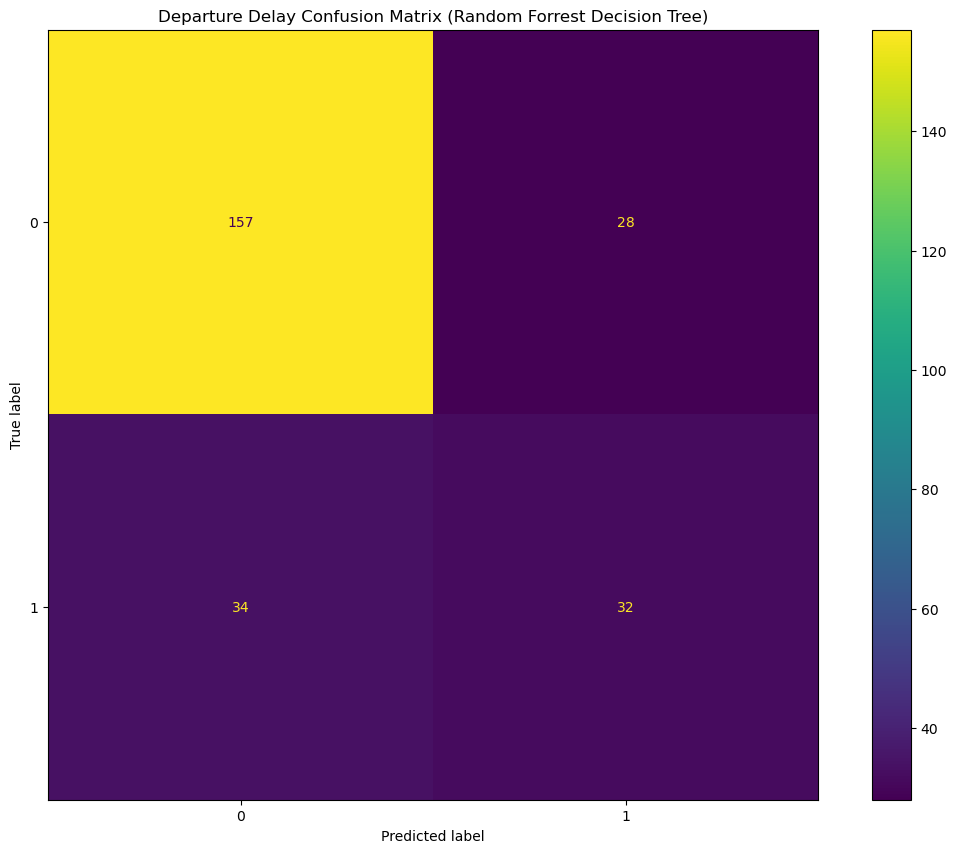

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

matrix = confusion_matrix(y_test, rfc_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(ax=ax1)
ax1.set_title("Departure Delay Confusion Matrix (Random Forrest Decision Tree)")

Text(0.5, 1.0, 'Departure Delay Random Forest Variable Importance')

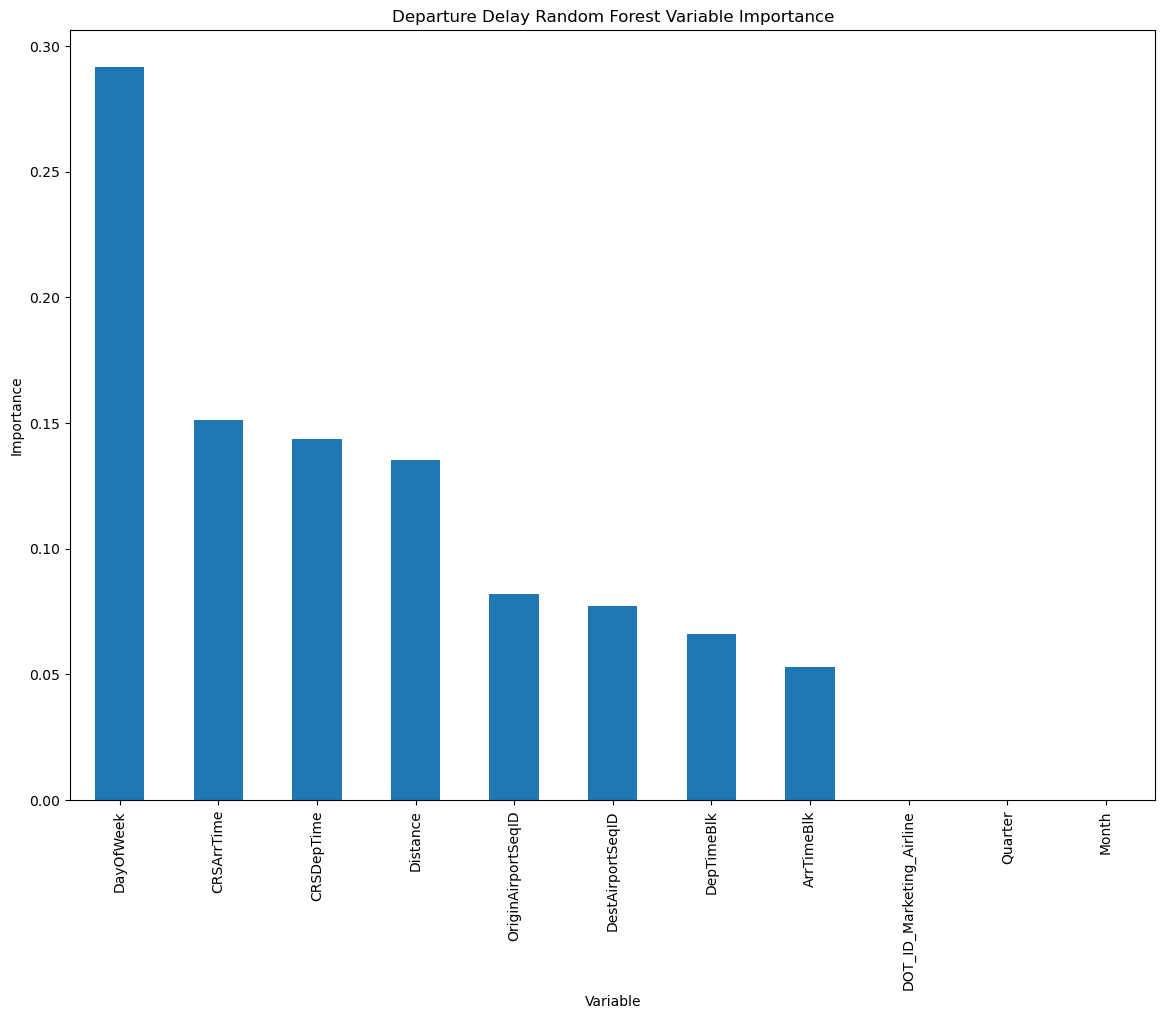

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
feature_importance = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_importance.plot.bar(ax=ax1)
ax1.set_xlabel("Variable")
ax1.set_ylabel("Importance")
ax1.set_title("Departure Delay Random Forest Variable Importance")

## Random Forrest Decision Tree (Multi-Class)

In [ ]:
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance', 'CRSDepTime',
 'CRSArrTime', 'Quarter', 'Month', 'DayOfWeek']]
df_y = df['DepartureDelayGroups']
# 'TaxiOut'
# LateAircraftDelay

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=2)
df_x, df_y = oversample.fit_resample(df_x, df_y)

In [ ]:
rfc = RandomForestClassifier(random_state=15).fit(x_train, y_train)

In [ ]:
rfc_pred = rfc.predict(x_test)

In [ ]:
print(f"Accuracy of Model: {accuracy_score(y_test, rfc_pred)}")

Accuracy of Model: 0.5258964143426295


In [ ]:
# print(classification_report(y_test, y_pred))

Text(0.5, 1.0, 'Departure Delay Group Confusion Matrix (Random Forrest Decision Tree)')

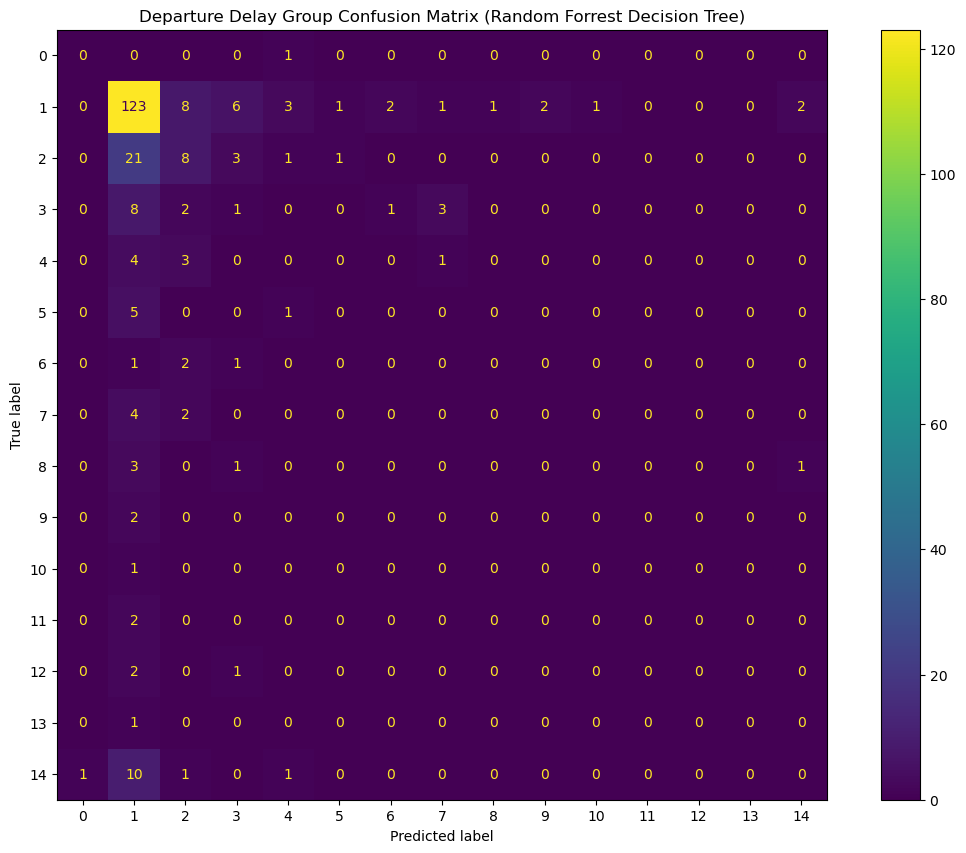

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))

matrix = confusion_matrix(y_test, rfc_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot(ax=ax1)
ax1.set_title("Departure Delay Group Confusion Matrix (Random Forrest Decision Tree)")

Text(0.5, 1.0, 'Departure Delay Group Random Forest Variable Importance')

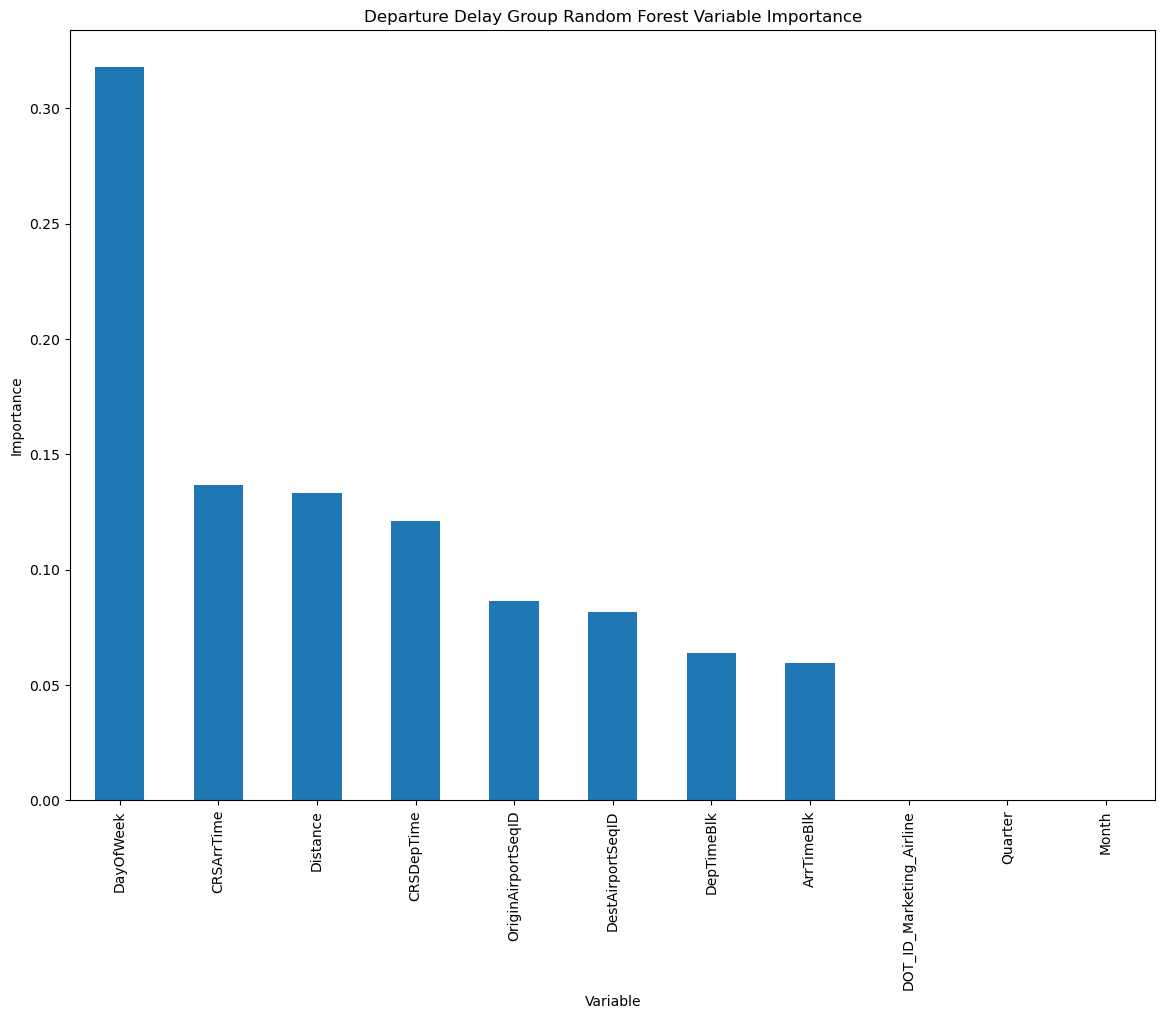

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(14,10))
feature_importance = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_importance.plot.bar(ax=ax1)
ax1.set_xlabel("Variable")
ax1.set_ylabel("Importance")
ax1.set_title("Departure Delay Group Random Forest Variable Importance")